# Bikeshare exploratory data analysis

Questions for data exploration:

- Which factors contribute most to the number of bicycles being checked out over the course of a given day?
- How much of an impact does weather have on demand?
- How does the behavior of casual users differ from subscribers?

The value in the count column is the one you need to predict. Beware that combining the columns __casual__ and __registerd__ results in the column count. Therefore you should exclude those columns from your model!

---

## Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [5]:
train = 'data/bike-sharing-demand/train.csv'
df = pd.read_csv(train, parse_dates=True, index_col = 0)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
<font color=blue>   
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
</font>
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

## Importance of features

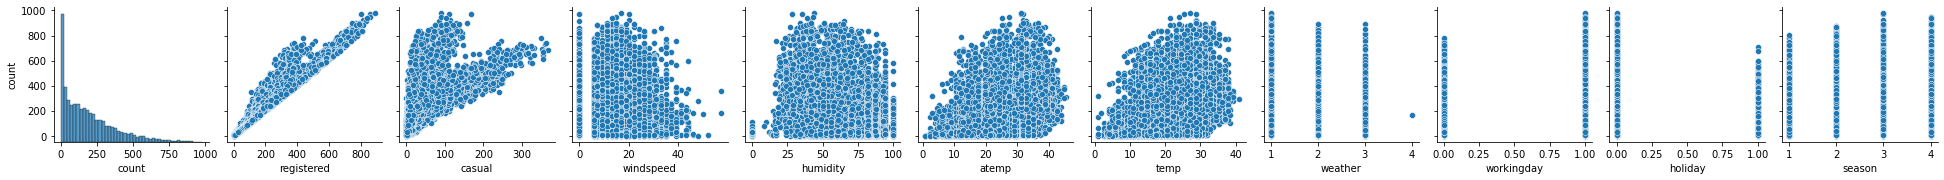

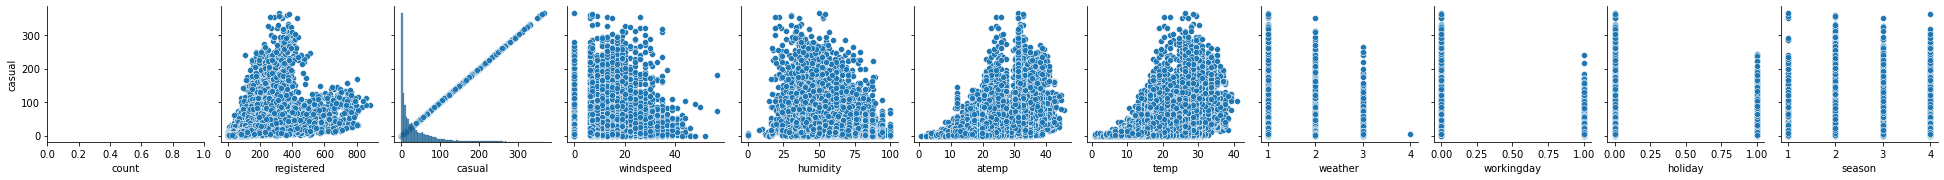

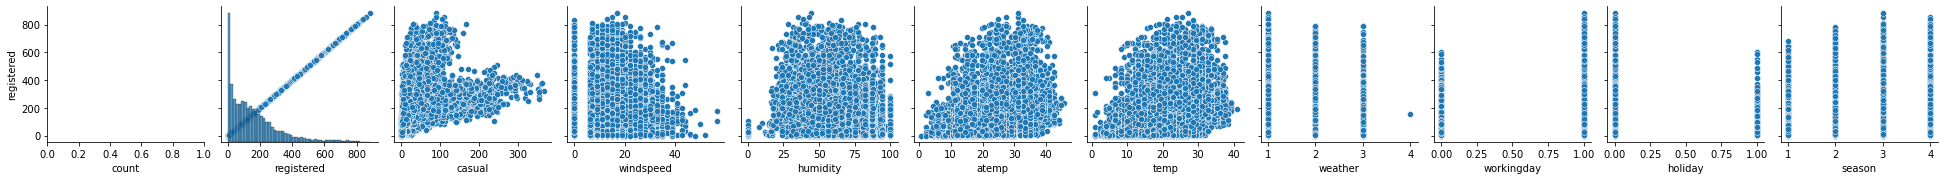

In [6]:
sns.pairplot(df, y_vars = ['count'], x_vars = df.columns[::-1])
sns.pairplot(df, y_vars = ['casual'], x_vars = df.columns[::-1])
sns.pairplot(df, y_vars = ['registered'], x_vars = df.columns[::-1])

In [7]:
df.shape

(10886, 11)

In [8]:
df.dropna()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


identical shape as with df.shape above => **no NaNs**

In [9]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

24 h format. At certain times probably typically less counts.

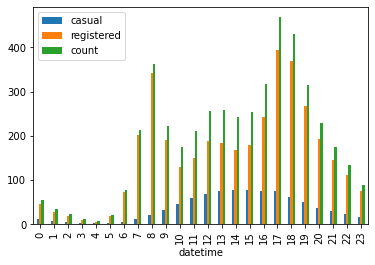

In [11]:
hours = df.index.hour
means_hours = df[['casual', 'registered', 'count']].groupby(hours).mean()
means_hours.plot.bar()

In [12]:
df_hours = df
df_hours['hours'] = df.index.hour
df_hours.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2


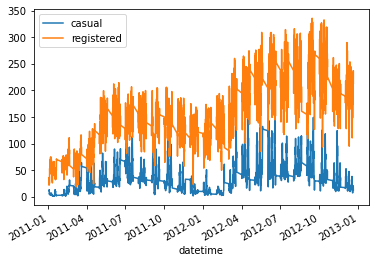

In [13]:
df[['casual', 'registered']].rolling(window=30).mean().plot()

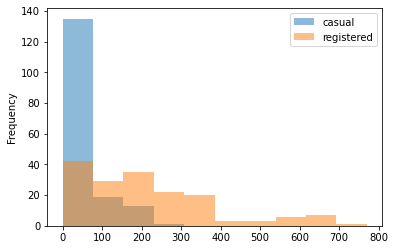

In [14]:
df.loc['2012-05-01 00:00:00':'2012-05-07 23:00:00'][['casual', 'registered']].plot(kind = 'hist', alpha = 0.5)

First observation: more registered than casual, and some week day as well as day time pattern
Second observation: wide spred of numbers. Treat this with np.log1p() on ytrain

In [15]:
df['month'] = df.index.month_name()
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,month
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,January
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,January
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,January


In [16]:
df['day of week'] = df.index.day_name()
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,month,day of week
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,January,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,January,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,January,Saturday


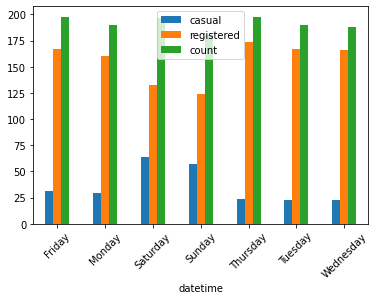

In [17]:
weekdays = df.index.day_name()
means = df[['casual', 'registered', 'count']].groupby(weekdays).mean()
means.plot.bar(rot=45)

total count weekday independent, on weekends more casual compensates less registered

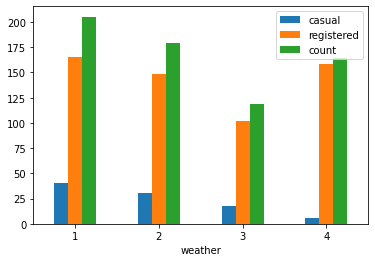

In [18]:
mean = df[['casual', 'registered', 'count']].groupby(df['weather']).mean()
mean.plot.bar(rot = 360)

In [19]:
bad_weather = df.loc[df['weather'] == 4]
bad_weather

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,month,day of week
datetime,,,,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18,January,Monday


just single data point, therefore ignore for feature engineering

In [20]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
df['year'] = df.index.year
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,month,day of week,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,January,Saturday,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,January,Saturday,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,January,Saturday,2011


In [22]:
df[['casual', 'registered','count']].loc[(df['year'] == 2012) & (df['month'] == 'January')]

,casual,registered,count
datetime,,,
2012-01-01 00:00:00,5,43,48
2012-01-01 01:00:00,15,78,93
2012-01-01 02:00:00,16,59,75
2012-01-01 03:00:00,11,41,52
2012-01-01 04:00:00,0,8,8
...,...,...,...
2012-01-19 19:00:00,5,229,234
2012-01-19 20:00:00,7,184,191
2012-01-19 21:00:00,4,117,121


In [23]:
data1 = df[['casual', 'registered','count', 'day of week']].loc[(df['year'] == 2012) & (df['month'] == 'January')]
data1.head(3)

,casual,registered,count,day of week
datetime,,,,
2012-01-01 00:00:00,5,43,48,Sunday
2012-01-01 01:00:00,15,78,93,Sunday
2012-01-01 02:00:00,16,59,75,Sunday


<BarContainer object of 10886 artists>

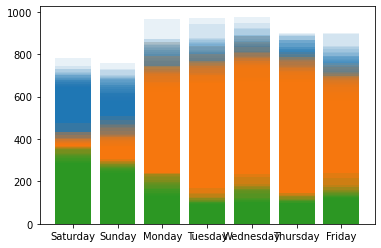

In [25]:
plt.bar(weekdays, height = df['count'], alpha = 0.1)
plt.bar(weekdays, height = df['registered'], alpha = 0.1)
plt.bar(weekdays, height = df['casual'], alpha = 0.1)

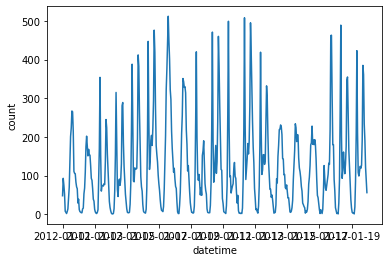

In [185]:
sns.lineplot(x = data1.index, y = data1['count'])